## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9952625	total: 58.9ms	remaining: 58.8s
1:	learn: 0.9755179	total: 59.9ms	remaining: 29.9s
2:	learn: 0.9559355	total: 61ms	remaining: 20.3s
3:	learn: 0.9391681	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9197743	total: 63ms	remaining: 12.5s
5:	learn: 0.9021963	total: 63.9ms	remaining: 10.6s
6:	learn: 0.8849840	total: 64.9ms	remaining: 9.2s
7:	learn: 0.8688201	total: 65.8ms	remaining: 8.16s
8:	learn: 0.8530839	total: 66.7ms	remaining: 7.34s
9:	learn: 0.8363526	total: 67.4ms	remaining: 6.67s
10:	learn: 0.8212767	total: 68.2ms	remaining: 6.13s
11:	learn: 0.8051581	total: 68.9ms	remaining: 5.67s
12:	learn: 0.7909035	total: 69.7ms	remaining: 5.29s
13:	learn: 0.7751923	total: 70.5ms	remaining: 4.96s
14:	learn: 0.7604063	total: 71.2ms	remaining: 4.68s
15:	learn: 0.7478531	total: 72ms	remaining: 4.43s
16:	learn: 0.7332942	total: 72.9ms	remaining: 4.21s
17:	learn: 0.7212287	total: 73.7ms	remaining: 4.02s
18:	learn: 0.7081806	total: 74.6ms	remaining: 3.85s

55:	learn: 0.4365413	total: 108ms	remaining: 1.82s
56:	learn: 0.4325408	total: 109ms	remaining: 1.8s
57:	learn: 0.4281344	total: 110ms	remaining: 1.78s
58:	learn: 0.4246269	total: 111ms	remaining: 1.77s
59:	learn: 0.4211117	total: 112ms	remaining: 1.75s
60:	learn: 0.4177319	total: 112ms	remaining: 1.73s
61:	learn: 0.4134354	total: 113ms	remaining: 1.71s
62:	learn: 0.4090830	total: 114ms	remaining: 1.7s
63:	learn: 0.4053974	total: 115ms	remaining: 1.68s
64:	learn: 0.4022387	total: 116ms	remaining: 1.66s
65:	learn: 0.3990872	total: 116ms	remaining: 1.65s
66:	learn: 0.3955915	total: 117ms	remaining: 1.63s
67:	learn: 0.3919552	total: 118ms	remaining: 1.62s
68:	learn: 0.3890010	total: 119ms	remaining: 1.6s
69:	learn: 0.3864307	total: 120ms	remaining: 1.59s
70:	learn: 0.3837047	total: 121ms	remaining: 1.58s
71:	learn: 0.3812187	total: 122ms	remaining: 1.57s
72:	learn: 0.3786510	total: 122ms	remaining: 1.55s
73:	learn: 0.3750182	total: 123ms	remaining: 1.54s
74:	learn: 0.3725196	total: 124ms	

154:	learn: 0.2562483	total: 191ms	remaining: 1.04s
155:	learn: 0.2553477	total: 192ms	remaining: 1.04s
156:	learn: 0.2540269	total: 193ms	remaining: 1.04s
157:	learn: 0.2530969	total: 194ms	remaining: 1.03s
158:	learn: 0.2517343	total: 195ms	remaining: 1.03s
159:	learn: 0.2508702	total: 196ms	remaining: 1.03s
160:	learn: 0.2500075	total: 197ms	remaining: 1.02s
161:	learn: 0.2493103	total: 197ms	remaining: 1.02s
162:	learn: 0.2486807	total: 198ms	remaining: 1.02s
163:	learn: 0.2479856	total: 199ms	remaining: 1.01s
164:	learn: 0.2472272	total: 200ms	remaining: 1.01s
165:	learn: 0.2464316	total: 201ms	remaining: 1.01s
166:	learn: 0.2457932	total: 202ms	remaining: 1s
167:	learn: 0.2451406	total: 202ms	remaining: 1s
168:	learn: 0.2444581	total: 203ms	remaining: 999ms
169:	learn: 0.2438212	total: 204ms	remaining: 996ms
170:	learn: 0.2431978	total: 205ms	remaining: 993ms
171:	learn: 0.2426667	total: 206ms	remaining: 990ms
172:	learn: 0.2419841	total: 206ms	remaining: 987ms
173:	learn: 0.2410

281:	learn: 0.1827679	total: 298ms	remaining: 759ms
282:	learn: 0.1824550	total: 299ms	remaining: 757ms
283:	learn: 0.1822529	total: 300ms	remaining: 755ms
284:	learn: 0.1817885	total: 300ms	remaining: 754ms
285:	learn: 0.1814093	total: 302ms	remaining: 753ms
286:	learn: 0.1813146	total: 303ms	remaining: 752ms
287:	learn: 0.1810597	total: 304ms	remaining: 751ms
288:	learn: 0.1806709	total: 305ms	remaining: 749ms
289:	learn: 0.1805116	total: 305ms	remaining: 748ms
290:	learn: 0.1801387	total: 306ms	remaining: 746ms
291:	learn: 0.1796497	total: 307ms	remaining: 745ms
292:	learn: 0.1792490	total: 308ms	remaining: 743ms
293:	learn: 0.1790262	total: 309ms	remaining: 742ms
294:	learn: 0.1787192	total: 310ms	remaining: 740ms
295:	learn: 0.1785773	total: 311ms	remaining: 739ms
296:	learn: 0.1779217	total: 311ms	remaining: 737ms
297:	learn: 0.1775056	total: 312ms	remaining: 735ms
298:	learn: 0.1770184	total: 313ms	remaining: 734ms
299:	learn: 0.1765774	total: 314ms	remaining: 733ms
300:	learn: 

379:	learn: 0.1560764	total: 381ms	remaining: 622ms
380:	learn: 0.1559873	total: 382ms	remaining: 621ms
381:	learn: 0.1558252	total: 383ms	remaining: 620ms
382:	learn: 0.1556424	total: 384ms	remaining: 618ms
383:	learn: 0.1551950	total: 385ms	remaining: 617ms
384:	learn: 0.1549352	total: 386ms	remaining: 616ms
385:	learn: 0.1547898	total: 386ms	remaining: 615ms
386:	learn: 0.1545579	total: 387ms	remaining: 613ms
387:	learn: 0.1545162	total: 388ms	remaining: 612ms
388:	learn: 0.1542002	total: 389ms	remaining: 611ms
389:	learn: 0.1538531	total: 390ms	remaining: 610ms
390:	learn: 0.1534316	total: 390ms	remaining: 608ms
391:	learn: 0.1532862	total: 391ms	remaining: 607ms
392:	learn: 0.1530645	total: 392ms	remaining: 606ms
393:	learn: 0.1527451	total: 393ms	remaining: 604ms
394:	learn: 0.1527062	total: 394ms	remaining: 603ms
395:	learn: 0.1523462	total: 395ms	remaining: 602ms
396:	learn: 0.1520956	total: 396ms	remaining: 601ms
397:	learn: 0.1516714	total: 396ms	remaining: 599ms
398:	learn: 

507:	learn: 0.1241206	total: 488ms	remaining: 473ms
508:	learn: 0.1241090	total: 489ms	remaining: 472ms
509:	learn: 0.1237625	total: 490ms	remaining: 471ms
510:	learn: 0.1235428	total: 491ms	remaining: 470ms
511:	learn: 0.1233066	total: 492ms	remaining: 469ms
512:	learn: 0.1231565	total: 493ms	remaining: 468ms
513:	learn: 0.1229531	total: 493ms	remaining: 467ms
514:	learn: 0.1227096	total: 494ms	remaining: 465ms
515:	learn: 0.1225469	total: 495ms	remaining: 464ms
516:	learn: 0.1222644	total: 496ms	remaining: 463ms
517:	learn: 0.1220783	total: 497ms	remaining: 462ms
518:	learn: 0.1218513	total: 498ms	remaining: 461ms
519:	learn: 0.1215168	total: 498ms	remaining: 460ms
520:	learn: 0.1211873	total: 499ms	remaining: 459ms
521:	learn: 0.1209173	total: 500ms	remaining: 458ms
522:	learn: 0.1207227	total: 501ms	remaining: 457ms
523:	learn: 0.1204678	total: 502ms	remaining: 456ms
524:	learn: 0.1204570	total: 503ms	remaining: 455ms
525:	learn: 0.1202983	total: 503ms	remaining: 454ms
526:	learn: 

608:	learn: 0.1049038	total: 572ms	remaining: 367ms
609:	learn: 0.1048883	total: 573ms	remaining: 366ms
610:	learn: 0.1047357	total: 573ms	remaining: 365ms
611:	learn: 0.1046196	total: 574ms	remaining: 364ms
612:	learn: 0.1044788	total: 575ms	remaining: 363ms
613:	learn: 0.1042613	total: 576ms	remaining: 362ms
614:	learn: 0.1040724	total: 577ms	remaining: 361ms
615:	learn: 0.1039234	total: 578ms	remaining: 360ms
616:	learn: 0.1037607	total: 578ms	remaining: 359ms
617:	learn: 0.1035530	total: 579ms	remaining: 358ms
618:	learn: 0.1033896	total: 580ms	remaining: 357ms
619:	learn: 0.1032109	total: 581ms	remaining: 356ms
620:	learn: 0.1030545	total: 582ms	remaining: 355ms
621:	learn: 0.1029871	total: 582ms	remaining: 354ms
622:	learn: 0.1029667	total: 583ms	remaining: 353ms
623:	learn: 0.1028495	total: 584ms	remaining: 352ms
624:	learn: 0.1027599	total: 585ms	remaining: 351ms
625:	learn: 0.1025429	total: 586ms	remaining: 350ms
626:	learn: 0.1025218	total: 587ms	remaining: 349ms
627:	learn: 

738:	learn: 0.0860165	total: 679ms	remaining: 240ms
739:	learn: 0.0858786	total: 680ms	remaining: 239ms
740:	learn: 0.0857578	total: 680ms	remaining: 238ms
741:	learn: 0.0856473	total: 681ms	remaining: 237ms
742:	learn: 0.0854874	total: 682ms	remaining: 236ms
743:	learn: 0.0853041	total: 683ms	remaining: 235ms
744:	learn: 0.0850520	total: 684ms	remaining: 234ms
745:	learn: 0.0849700	total: 685ms	remaining: 233ms
746:	learn: 0.0847730	total: 686ms	remaining: 232ms
747:	learn: 0.0847148	total: 687ms	remaining: 231ms
748:	learn: 0.0845476	total: 687ms	remaining: 230ms
749:	learn: 0.0844342	total: 688ms	remaining: 229ms
750:	learn: 0.0843604	total: 689ms	remaining: 228ms
751:	learn: 0.0842666	total: 690ms	remaining: 228ms
752:	learn: 0.0841699	total: 691ms	remaining: 227ms
753:	learn: 0.0840423	total: 692ms	remaining: 226ms
754:	learn: 0.0839352	total: 692ms	remaining: 225ms
755:	learn: 0.0839142	total: 693ms	remaining: 224ms
756:	learn: 0.0838188	total: 694ms	remaining: 223ms
757:	learn: 

836:	learn: 0.0740368	total: 761ms	remaining: 148ms
837:	learn: 0.0739689	total: 762ms	remaining: 147ms
838:	learn: 0.0738609	total: 763ms	remaining: 146ms
839:	learn: 0.0738435	total: 764ms	remaining: 146ms
840:	learn: 0.0737392	total: 765ms	remaining: 145ms
841:	learn: 0.0737029	total: 766ms	remaining: 144ms
842:	learn: 0.0736897	total: 767ms	remaining: 143ms
843:	learn: 0.0735556	total: 767ms	remaining: 142ms
844:	learn: 0.0735107	total: 768ms	remaining: 141ms
845:	learn: 0.0733910	total: 769ms	remaining: 140ms
846:	learn: 0.0732541	total: 770ms	remaining: 139ms
847:	learn: 0.0731468	total: 771ms	remaining: 138ms
848:	learn: 0.0730126	total: 772ms	remaining: 137ms
849:	learn: 0.0729106	total: 772ms	remaining: 136ms
850:	learn: 0.0728170	total: 773ms	remaining: 135ms
851:	learn: 0.0727567	total: 774ms	remaining: 134ms
852:	learn: 0.0726610	total: 775ms	remaining: 134ms
853:	learn: 0.0725001	total: 776ms	remaining: 133ms
854:	learn: 0.0723832	total: 776ms	remaining: 132ms
855:	learn: 

965:	learn: 0.0623323	total: 869ms	remaining: 30.6ms
966:	learn: 0.0622552	total: 870ms	remaining: 29.7ms
967:	learn: 0.0622339	total: 871ms	remaining: 28.8ms
968:	learn: 0.0620793	total: 872ms	remaining: 27.9ms
969:	learn: 0.0620311	total: 873ms	remaining: 27ms
970:	learn: 0.0619032	total: 874ms	remaining: 26.1ms
971:	learn: 0.0617945	total: 875ms	remaining: 25.2ms
972:	learn: 0.0616591	total: 875ms	remaining: 24.3ms
973:	learn: 0.0615892	total: 876ms	remaining: 23.4ms
974:	learn: 0.0615452	total: 877ms	remaining: 22.5ms
975:	learn: 0.0614782	total: 878ms	remaining: 21.6ms
976:	learn: 0.0613258	total: 879ms	remaining: 20.7ms
977:	learn: 0.0611883	total: 879ms	remaining: 19.8ms
978:	learn: 0.0610872	total: 880ms	remaining: 18.9ms
979:	learn: 0.0609816	total: 881ms	remaining: 18ms
980:	learn: 0.0608988	total: 882ms	remaining: 17.1ms
981:	learn: 0.0608239	total: 883ms	remaining: 16.2ms
982:	learn: 0.0607751	total: 884ms	remaining: 15.3ms
983:	learn: 0.0606891	total: 885ms	remaining: 14.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

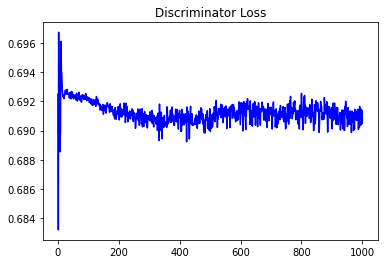

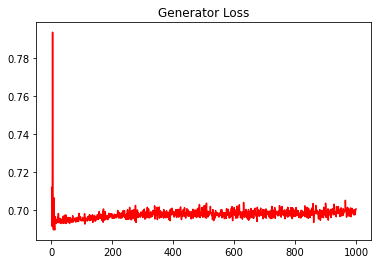

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13978690831814403


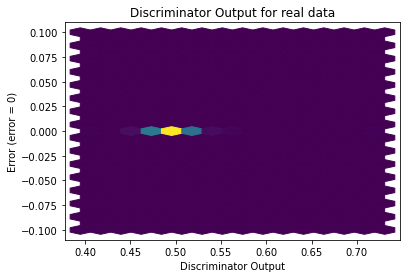

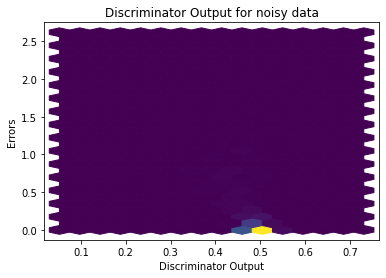

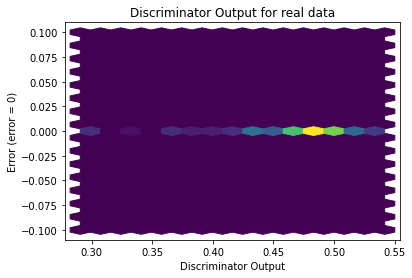

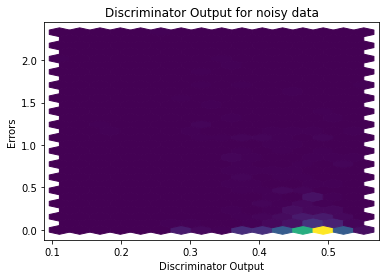

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


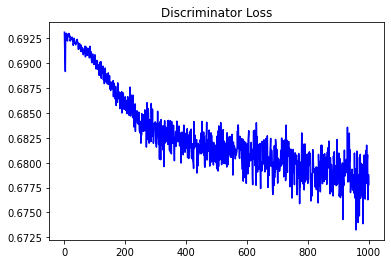

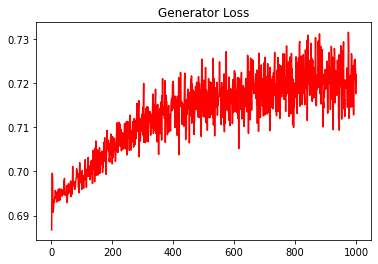

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12439077066384739


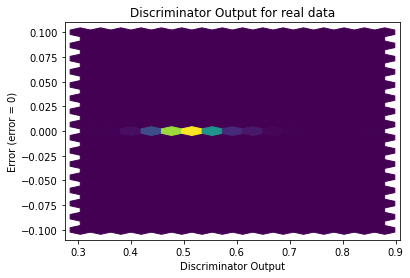

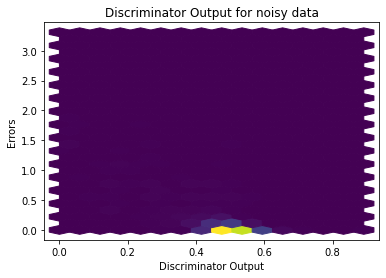

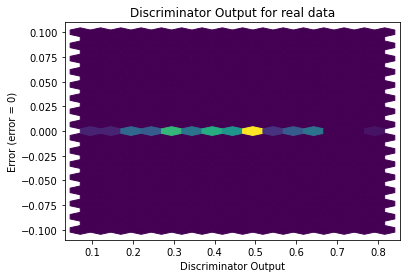

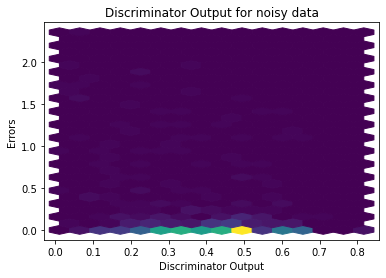

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6404]], requires_grad=True)
